# The CNN


## Setting up the model

### Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### Step 2: Load The Preprocessed and Augmented Data

In [2]:
import zipfile

zip_file_name = 'npy_files.zip'
extract_dir = './data'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [3]:
data_dir = './data'

X_train = np.load(f'{data_dir}/X_train_augmented.npy')
y_train = np.load(f'{data_dir}/y_train_augmented.npy')

X_validation = np.load(f'{data_dir}/X_validation.npy')
y_validation = np.load(f'{data_dir}/y_validation.npy')

X_test = np.load(f'{data_dir}/X_test.npy')
y_test = np.load(f'{data_dir}/y_test.npy')

In [4]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_validation shape:', X_validation.shape)
print('y_validation shape:', y_validation.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4752, 431, 13, 1)
y_train shape: (4752,)
X_validation shape: (297, 431, 13, 1)
y_validation shape: (297,)
X_test shape: (297, 431, 13, 1)
y_test shape: (297,)


### Step 3: Encode Labels to Categorical Format

- to_categorical: Converts integer labels into one-hot encoded vectors.

 - Example: If there are 10 classes, label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
- Calculating num_classes:

  - np.unique(y_train): Finds all unique classes in y_train.
  - len(): Determines the number of unique classes.
  - Purpose: Needed to correctly one-hot encode the labels and to define the output layer of the model.
- Converting Labels:

  - y_train, y_validation, y_test: All labels are converted to one-hot encoded format for compatibility with the loss function and the model's expected output.
- Printing Shapes:

  - Purpose: To confirm that the labels have been correctly converted and to check the new dimensions.
- Justification:

  - Model Compatibility: The model outputs probability distributions over classes (one-hot vectors), so labels must be in the same format.
  - Loss Function: When using categorical_crossentropy, labels need to be one-hot encoded.

In [5]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
print('Number of classes:', num_classes)

y_train = to_categorical(y_train, num_classes=num_classes)
y_validation = to_categorical(y_validation, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print('y_train shape after to_categorical:', y_train.shape)
print('y_validation shape after to_categorical:', y_validation.shape)
print('y_test shape after to_categorical:', y_test.shape)

Number of classes: 10
y_train shape after to_categorical: (4752, 10)
y_validation shape after to_categorical: (297, 10)
y_test shape after to_categorical: (297, 10)


### Step 4: Define the Model Architecture

- Model Type: Sequential model, which is a linear stack of layers.

- Layer-by-Layer Explanation:

 1. First Convolutional Block:

    - Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape)
      - 32 Filters: Learns 32 different filters.
      - Kernel Size (3, 3): Each filter is of size 3x3.
      - Activation 'relu': Introduces non-linearity.
      - Padding 'same': Output feature map has the same dimensions as the input.
      - input_shape: Specifies the shape of the input data (required for the first layer).
    - BatchNormalization(): Normalizes the outputs of the previous layer to stabilize and accelerate training.
    - MaxPooling2D((2, 2)): Reduces the spatial dimensions by half, helping to decrease computational load and prevent overfitting.
    - Dropout(0.3): Randomly sets 30% of the inputs to zero during training, helping to prevent overfitting.
  2. Second Convolutional Block:

    - Conv2D(64, (3, 3), activation='relu', padding='same')
      - 64 Filters: Learns more complex features.
    - Other layers: Same as the first block but with increased filter count.
  3. Third Convolutional Block:

    - Similar to the second block but maintains the number of filters.
  4. Global Average Pooling:

    - GlobalAveragePooling2D(): Reduces each feature map to a single number by taking the average over all spatial locations.
    - Justification: Reduces the number of parameters and helps prevent overfitting compared to a Flatten layer followed by Dense layers.
  5. Fully Connected Layers:

    - Dense(128, activation='relu'): Learns complex combinations of the features extracted by convolutional layers.
    - Dropout(0.4): Higher dropout rate to further prevent overfitting.
    - Dense(num_classes, activation='softmax'): Output layer that produces probabilities for each class.
- model.summary(): Prints a summary of the model architecture, including output shapes and the number of parameters at each layer.

- Justification:

- Convolutional Layers: Capture local spatial patterns in the MFCC inputs.
Increasing Filters: Allows the model to learn more complex features at deeper layers.
- Batch Normalization: Improves training speed and stability.
- Pooling Layers: Reduce spatial dimensions, controlling overfitting and computational requirements.
- Dropout: Regularization technique to prevent overfitting by making the network more robust.
- Global Average Pooling vs. Flatten:
  - Global Average Pooling: Reduces parameters, lowering the risk of overfitting.
  - Flatten: Could lead to a very large number of parameters, especially with large feature maps.


In [ ]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)                   │ (None, 431, 13, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_77               │ (None, 431, 13, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 215, 6, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 215, 6, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 215, 6, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_78               │ (None, 215, 6, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 107, 3, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 107, 3, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 107, 3, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 107, 3, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 53, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 53, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,994 (257.79 KB)

 Trainable params: 65,674 (256.54 KB)

 Non-trainable params: 320 (1.25 KB)

### Step 5: Compile the model

- Optimizer: Adam optimizer is used with a learning rate of 0.0001.
  - Adam: An adaptive learning rate optimization algorithm that combines the benefits of AdaGrad and RMSProp.
  - Learning Rate: A small learning rate is chosen to ensure stable convergence.
- Loss Function: 'sparse_categorical_crossentropy' is specified.
  - Note: This loss function expects integer labels, not one-hot encoded labels.
- Metrics: ['accuracy'] is specified to monitor the accuracy during training and validation.

In [77]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

- ModelCheckpoint:
  - Purpose: Saves the model at the end of every epoch.
  - Parameters:
    - filepath: Where to save the model.
    - save_best_only=False: Saves the model at every epoch, not just when there's an improvement.
    - monitor='val_loss': Monitors validation loss to determine when to save.
    - mode='min': Looks for minimum validation loss.
    - verbose=1: Provides output when the model is saved.
- EarlyStopping:
  - Purpose: Stops training when the monitored metric (validation loss) stops improving.
  - Parameters:
    - monitor='val_loss': Monitors validation loss.
    - patience=20: Waits for 20 epochs without improvement before stopping.
    - min_delta=0: Minimum change in the monitored metric to qualify as an improvement.
    - Directory Creation:
    - os.makedirs(save_dir, exist_ok=True): Ensures that the directory for saving models exists.
- Justification:

  - ModelCheckpoint: Useful for saving the model at different stages, allowing for rollback if needed.
  - EarlyStopping: Helps prevent overfitting by stopping training once the model stops improving on the validation set.
  - Directory Management: Ensures that file operations do not fail due to missing directories.



- model.fit(): Trains the model on the training data.

- Parameters:

  - X_train, y_train_int: Training data and integer labels.
  - validation_data: Tuple of validation data and labels for evaluating the model during training.
  - epochs=100: The model will train for up to 100 epochs unless early stopping is triggered.
  - batch_size=64: Number of samples per gradient update.
  - callbacks: List of callbacks to apply during training.
- Justification:

  - Epochs: A high number to allow the model to train thoroughly, with early stopping to prevent overfitting.
  - Batch Size: A balance between training speed and stability.
  - Callbacks: Improve training efficiency and model management.

In [78]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

save_dir = './models/'

os.makedirs(save_dir, exist_ok=True)
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    save_best_only=False,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=0
)

y_train_int = np.argmax(y_train, axis=1)
y_validation_int = np.argmax(y_validation, axis=1)
y_test_int = np.argmax(y_test, axis=1)


history = model.fit(
    X_train, y_train_int,
    validation_data=(X_validation, y_validation_int),
    epochs=100,
    batch_size=64,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1710 - loss: 2.5238
Epoch 1: saving model to best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.1717 - loss: 2.5199 - val_accuracy: 0.2761 - val_loss: 1.9980
Epoch 2/100
63/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3598 - loss: 1.8211
Epoch 2: saving model to best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3627 - loss: 1.8130 - val_accuracy: 0.4242 - val_loss: 1.8323
Epoch 3/100
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4354 - loss: 1.6237
Epoch 3: saving model to best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4352 - loss: 1.6230 - val_accuracy: 0.4714 - val_loss: 1.7008
Epoch 4/100
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4652 - loss: 1.5173
Epoch 4: saving model to best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4660 - loss: 1.5144 - val_accuracy: 0.5354 - val_loss: 1.5809
Epoch 5/100
67/75 ━━━━━━━━━━━

### Step 6: Evaluate the Model

- Label Preparation:

  - Converting y_test to integer labels: Necessary for evaluation since the model expects integer labels.
- Model Evaluation:

- model.evaluate(X_test, y_test_int): Computes the loss and accuracy on the test set.
- Prints Test Accuracy: Provides a quick metric to assess model performance.
- Generating Predictions:

  - model.predict(X_test): Generates predicted probabilities for each class.
  - np.argmax(y_pred, axis=1): Converts probabilities to predicted class labels.
  - y_true: Actual class labels.
- Classification Report:

  - classification_report(y_true, y_pred_classes): Provides precision, recall, F1-score, and support for each class.
  - Confusion Matrix:

    - confusion_matrix(y_true, y_pred_classes): Computes a confusion matrix to visualize the performance.
  - Plotting:
    - plt.figure(figsize=(10, 8)): Sets the size of the plot.
    - sns.heatmap: Creates a heatmap of the confusion matrix.
- Justification:

  - Performance Assessment: Evaluating on the test set provides an unbiased estimate of model performance.
  - Detailed Metrics: The classification report and confusion matrix give insights into how the model performs on each class.
  - Visualization: Helps in identifying specific classes where the model may be underperforming.

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8059 - loss: 0.4912
Test Accuracy: 82.49%
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        36
           1       1.00      0.83      0.91        29
           2       0.69      0.67      0.68        27
           3       0.61      0.88      0.72        26
           4       1.00      0.83      0.91        30
           5       0.81      0.79      0.80        33
           6       1.00      0.53      0.70        30
           7       0.88      0.97      0.92        30
           8       0.96      0.85      0.90        26
           9       0.74      0.87      0.80        30

    accuracy                           0.82       297
   macro avg       0.85      0.82      0.82       297
weighted avg       0.85      0.82      0.82       297



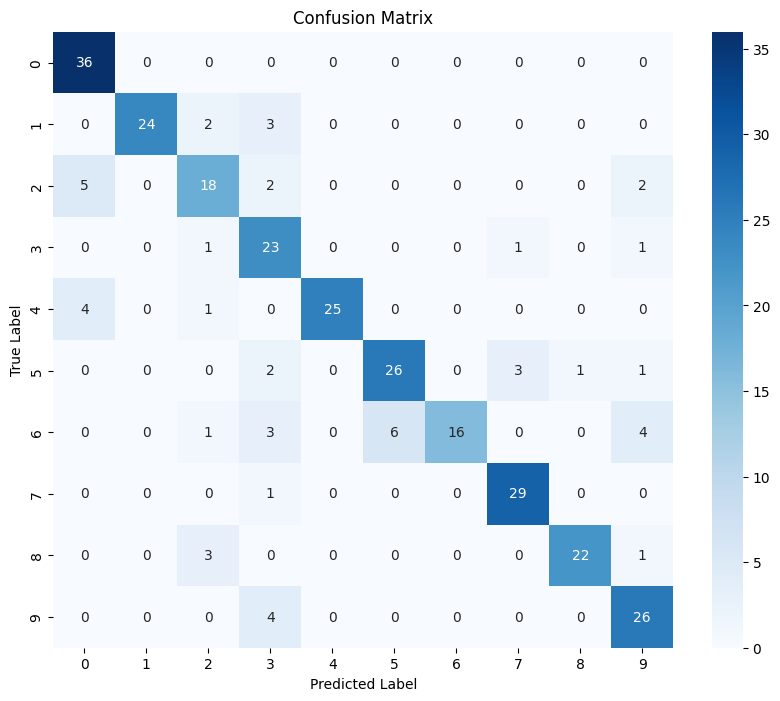

In [79]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

model = keras.models.load_model('best_model.keras')

y_test_int = np.argmax(y_test, axis=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test_int)
print(f'Test Accuracy: {test_accuracy:.2%}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test_int

print(classification_report(y_true, y_pred_classes))

conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Step 7: Visualize Training History
- Purpose: To visualize how the model's performance changes over epochs.

- Plotting Training and Validation Metrics:

  - Accuracy: Helps assess if the model is learning and generalizing well.
  - Loss: Provides insights into how well the model is optimizing the loss function.
- Interpreting the Plots:

  - Overfitting: If the training accuracy continues to improve while validation accuracy plateaus or decreases.
  - Underfitting: If both training and validation accuracy are low.
- Justification:

  - Model Diagnostics: Visualizations are essential for diagnosing issues like overfitting or underfitting.
  - Guiding Model Improvements: Based on the plots, decisions can be made to adjust hyperparameters or modify the model architecture.

Accuracy:

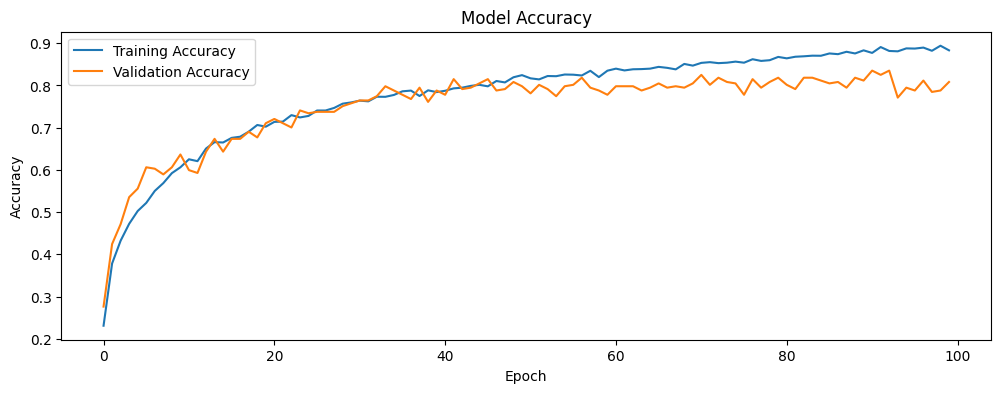

In [80]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss:

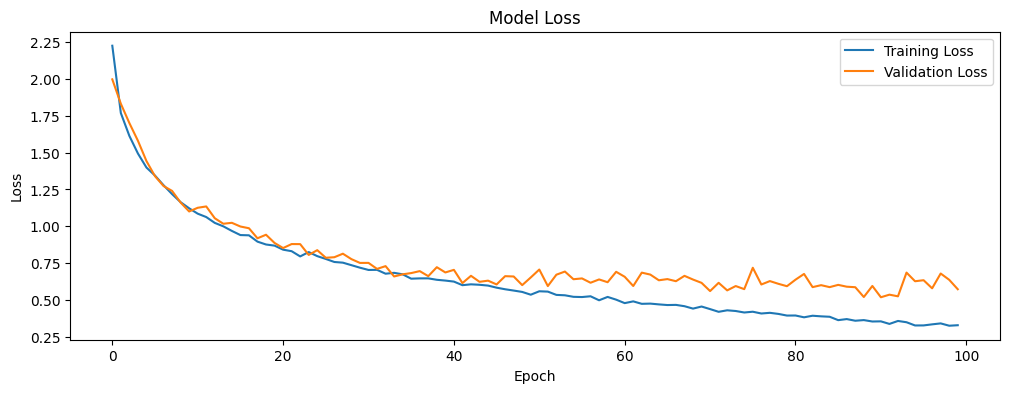

In [81]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 8: Save Model

In [83]:
model.save('my_genre_classification_model.keras')
